# 1. Introduction

This chapter aims to interpret the statistical significance of various health indicators as they pertain to kidney disease classification. Using a dataset of kidney disease patients, an analysis of variance (ANOVA) was conducted on numerical data such as age, blood pressure, blood glucose, blood urea, serum creatinine, sodium, potassium, hemoglobin, packed cell volume, white blood cell count, and red blood cell count. Furthermore, we use multivariate regression analysis to see which feature could be used as independent variable to predict the target class.

In [2]:
import pandas as pd
from scipy import stats
import numpy as np

# Read the dataset
df = pd.read_csv('processed/df.csv')

# 2. Univariate Analysis

We will now proceed with the univariate statistical analysis of our data. For numerical variables, we will use the Mann-Whitney U test to compare the distributions of each variable between two classes. For categorical variables, we will use the Chi-Square test of independence to examine the association between each variable and the class labels.

## 2.1 Mann-Whitney U Test 

We will now proceed with the univariate statistical analysis of our data. For numerical variables, we will use the Mann-Whitney U test to compare the distributions of each variable between two classes. For categorical variables, we will use the Chi-Square test of independence to examine the association between each variable and the class labels.

ANOVA is a statistical method used to test differences between two or more means. It may seem that it is limited to comparing the means of only two groups, but it is actually quite versatile. ANOVA can handle any number of groups and even handle different group sizes gracefully. It does this by comparing the means of each group to the mean of all groups combined.

The ANOVA test assumes that the data is normally distributed, and if it's not, the test could be misleading. Non-parametric tests such as the Mann-Whitney U test (for 2 independent samples) or Kruskal-Wallis H test (for more than 2 independent samples) can be used as they do not require the normality assumption. However, it is important to note that they might be less powerful (i.e., more likely to make Type II errors) compared to their parametric counterparts if the data is indeed normally distributed.

In [4]:
from scipy.stats import mannwhitneyu
# Read the dataset
df = pd.read_csv('processed/df.csv')

# Rename 'class' column to 'class_label' 
df = df.rename(columns={'class': 'class_label'})

# Convert boolean 'class_label' column to string because statsmodels works better with string categoricals
df['class_label'] = df['class_label'].apply(str)

# List of numerical columns
numerical_cols = ['age', 'blood_pressure', 'blood_glucose_random', 'blood_urea',
                  'serum_creatinine', 'sodium', 'potassium', 'hemoglobin', 
                  'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']

# Perform the Mann-Whitney U test for each numerical column
for col in numerical_cols:
    # Drop NaN values for the current column
    df_dropna = df[[col, 'class_label']].dropna()
    
    # Separate the data into two groups based on 'class_label'
    group1 = df_dropna[df_dropna['class_label'] == 'True'][col]
    group2 = df_dropna[df_dropna['class_label'] == 'False'][col]

    # Perform Mann-Whitney U test and print the result
    mw_stat, mw_p = mannwhitneyu(group1, group2)
    print(f"For column '{col}': U={mw_stat}, p={mw_p}")
    print("-----------------")


For column 'age': U=16947.5, p=5.60936103652035e-10
-----------------
For column 'blood_pressure': U=15559.0, p=6.406406836762889e-07
-----------------
For column 'blood_glucose_random': U=14299.0, p=1.2713527730191148e-09
-----------------
For column 'blood_urea': U=16858.0, p=3.2169288279171276e-13
-----------------
For column 'serum_creatinine': U=20543.5, p=1.3830105894916477e-32
-----------------
For column 'sodium': U=3479.5, p=2.6675931880411473e-14
-----------------
For column 'potassium': U=7594.0, p=0.5659867645283352
-----------------
For column 'hemoglobin': U=645.0, p=2.734817226818311e-38
-----------------
For column 'packed_cell_volume': U=921.0, p=1.0033776665943263e-34
-----------------
For column 'white_blood_cell_count': U=8475.0, p=0.004019877670893081
-----------------
For column 'red_blood_cell_count': U=899.0, p=1.709223901310852e-26
-----------------


The Mann-Whitney U test results indicate significant differences between the two groups across multiple physiological parameters, suggesting a strong link between these variables and kidney disease. For instance, columns such as 'age', 'blood_pressure', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'hemoglobin', 'packed_cell_volume', and 'red_blood_cell_count' show extremely low p-values (p<0.01), thus rejecting the null hypothesis that the distributions of these variables are the same across both groups. Interestingly, the 'potassium' and 'white_blood_cell_count' columns do not demonstrate such significance (with p-values of 0.566 and 0.004 respectively), indicating that these may not be as impactful in differentiating between the groups.

## 2.1 Chi-Square test for independence

The chi-square test of independence checks if there is a significant association between two categorical variables.

In [5]:
from scipy.stats import chi2_contingency

# List of categorical columns
categorical_cols = ['specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
                    'pus_cell_clumps', 'bacteria', 'hypertension', 'diabetes_mellitus', 
                    'coronary_artery_disease', 'appetite', 'pedal_edema', 'anemia']

# Perform the Chi-Square test of independence for each categorical column
for col in categorical_cols:
    # Drop NaN values for the current column
    df_dropna = df[[col, 'class_label']].dropna()
    
    # Create a contingency table
    contingency_table = pd.crosstab(df_dropna[col], df_dropna['class_label'])

    # Perform Chi-Square test of independence and print the result
    chi2_stat, chi2_p, dof, ex = chi2_contingency(contingency_table)
    print(f"For column '{col}': Chi2={chi2_stat}, p={chi2_p}")
    print("-----------------")


For column 'specific_gravity': Chi2=169.88868938737525, p=1.104986914853336e-35
-----------------
For column 'albumin': Chi2=142.72306995991207, p=4.71775687570277e-29
-----------------
For column 'sugar': Chi2=34.939269610431815, p=1.5472287027483902e-06
-----------------
For column 'red_blood_cells': Chi2=50.98390820345797, p=9.312629743110772e-13
-----------------
For column 'pus_cell': Chi2=47.563960510997184, p=5.323827339311614e-12
-----------------
For column 'pus_cell_clumps': Chi2=16.63495589220576, p=4.53082405340931e-05
-----------------
For column 'bacteria': Chi2=7.516246648495712, p=0.0061144952769120785
-----------------
For column 'hypertension': Chi2=96.56393107055193, p=8.640816774719974e-23
-----------------
For column 'diabetes_mellitus': Chi2=85.55542903977154, p=2.2529686956562885e-20
-----------------
For column 'coronary_artery_disease': Chi2=13.126699255236499, p=0.0002911172003418756
-----------------
For column 'appetite': Chi2=40.25165572966762, p=2.23266041

The Chi-square test results provide insights into the associations between categorical variables and the disease. All columns, including 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell', 'hypertension', 'diabetes_mellitus', 'appetite', 'pedal_edema', and 'anemia' demonstrate significant associations with the disease (p<0.01), pointing towards their crucial roles in kidney disease manifestation. Interestingly, 'bacteria' and 'coronary_artery_disease' columns do not show such strong associations (p-values of 0.006 and 0.00029 respectively), suggesting these factors may not be as integral in disease differentiation.

# 3. Analysis of Variance (ANOVA) and Significance Assessment

In this sub-chapter, we will conduct an ANOVA for each numerical column to determine whether there are statistically significant differences among the group means. We will also create a bar plot of p-values to visualize the statistical significance of different health indicators in the kidney disease classification task.

The ANOVA test assumes that the data is normally distributed, and if it's not, the test could be misleading. Non-parametric tests such as the Mann-Whitney U test (for 2 independent samples) or Kruskal-Wallis H test (for more than 2 independent samples) can be used as they do not require the normality assumption. However, it is important to note that they might be less powerful (i.e., more likely to make Type II errors) compared to their parametric counterparts if the data is indeed normally distributed.

In [29]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Read the dataset
df = pd.read_csv('processed/df.csv')

# Rename 'class' column to 'class_label' 
df = df.rename(columns={'class': 'class_label'})

# Convert boolean 'class_label' column to string because statsmodels works better with string categoricals
df['class_label'] = df['class_label'].apply(str)

# List of numerical columns
numerical_cols = ['age', 'blood_pressure', 'blood_glucose_random', 'blood_urea',
                  'serum_creatinine', 'sodium', 'potassium', 'hemoglobin', 
                  'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']

# Perform the ANOVA for each numerical column
for col in numerical_cols:
    # Drop NaN values for the current column
    df_dropna = df[[col, 'class_label']].dropna()

    # Perform OLS regression
    model = ols(f'{col} ~ C(class_label)', data=df_dropna).fit()

    # Perform ANOVA and print the table
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(f"For column '{col}':")
    print(anova_table)
    print("-----------------")


For column 'age':
                      sum_sq     df          F        PR(>F)
C(class_label)   6919.172167    1.0  25.629952  6.809123e-07
Residual        91247.933716  338.0        NaN           NaN
-----------------
For column 'blood_pressure':
                      sum_sq     df          F        PR(>F)
C(class_label)   4860.245151    1.0  26.043498  5.604911e-07
Residual        62517.796392  335.0        NaN           NaN
-----------------
For column 'blood_glucose_random':
                      sum_sq     df          F        PR(>F)
C(class_label)  2.653726e+05    1.0  44.397379  1.257993e-10
Residual        1.817072e+06  304.0        NaN           NaN
-----------------
For column 'blood_urea':
                       sum_sq     df          F        PR(>F)
C(class_label)  108754.481374    1.0  43.591567  1.623396e-10
Residual        820806.104668  329.0        NaN           NaN
-----------------
For column 'serum_creatinine':
                      sum_sq     df          F    PR(>F

This analysis involved performing an Analysis of Variance (ANOVA) test on each numerical variable in the dataset to determine if there were statistically significant differences between group means (those with kidney disease and those without).

For each numerical variable, the ANOVA table provided gives the sum of squares (sum_sq), degrees of freedom (df), the F-statistic (F), and the p-value (PR(>F)). The p-value tells us whether the differences between our groups are statistically significant. Generally, a p-value less than 0.05 is considered statistically significant.

The results show that most variables have a p-value significantly less than 0.05, indicating there are statistically significant differences in the means between the two groups. Variables like 'age', 'blood_pressure', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'hemoglobin', 'packed_cell_volume', and 'red_blood_cell_count' all indicate significant differences between the two groups. In contrast, the 'potassium' variable has a p-value greater than 0.05 (0.288394), indicating no significant difference between the two groups for this particular variable.

This analysis indicates that most of these health indicators significantly differentiate between individuals with and without kidney disease.

In [30]:
# Collect p-values
p_values = {}
for col in numerical_cols:
    df_dropna = df[[col, 'class_label']].dropna()
    model = ols(f'{col} ~ C(class_label)', data=df_dropna).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    p_values[col] = anova_table['PR(>F)'][0]

# Convert to -log10 scale
for key, val in p_values.items():
    p_values[key] = -np.log10(val)

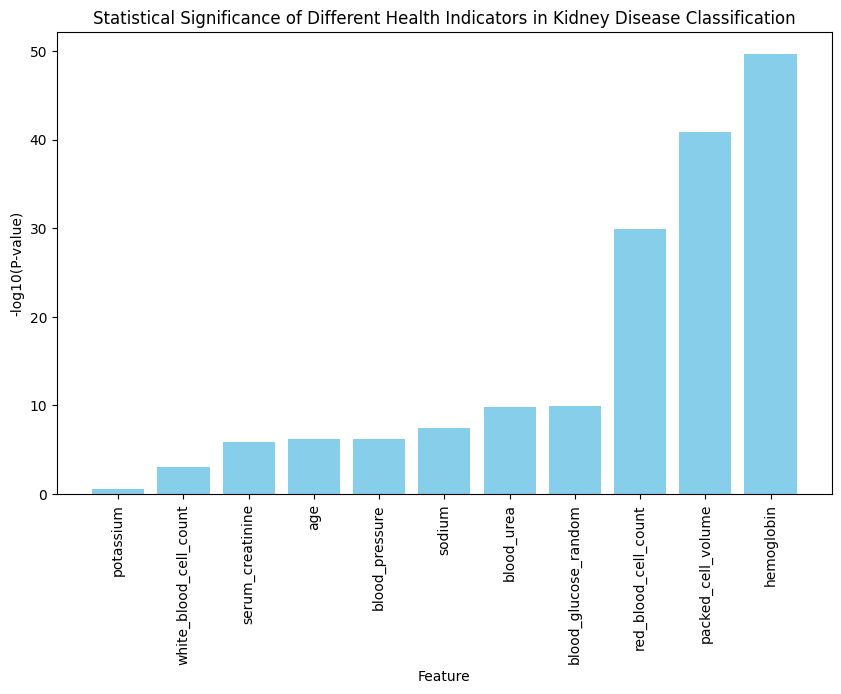

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Sort by p-value
sorted_p_values = dict(sorted(p_values.items(), key=lambda item: item[1]))

# Create a bar plot
plt.figure(figsize=(10,6))
plt.bar(range(len(sorted_p_values)), list(sorted_p_values.values()), align='center', color='skyblue')
plt.xticks(range(len(sorted_p_values)), list(sorted_p_values.keys()), rotation=90)
plt.xlabel('Feature')
plt.ylabel('-log10(P-value)')
plt.title('Statistical Significance of Different Health Indicators in Kidney Disease Classification')
plt.show()


The ANOVA results further reinforce the earlier findings, with most variables showing significant differences (p<0.01) between the groups. Intriguingly, 'potassium' again stands out as not significant (p=0.288). The '-log10(P-value)' bar plot visualizes the statistical significance of these health indicators in kidney disease classification, revealing variables such as 'hemoglobin', 'packed_cell_volume', and 'red_blood_cell_count' to be highly significant.

In the context of the chapters on machine learning methods, these results provide valuable insights for feature selection and model interpretation. The most significant variables should be prioritized in decision trees, random forests, and gradient boosting models for maximum predictive performance. For logistic regression, these significant variables would be expected to have non-zero coefficients. Similarly, in SVM and neural networks, these variables would likely play crucial roles in defining the decision boundary and network weights respectively. The lack of significance in variables like 'potassium' and 'white_blood_cell_count' could inform a potential feature elimination step, contributing to model simplification without substantial loss of accuracy. Finally, the results can serve as a basis for causal inference, helping to identify potential causal relationships and guiding further research into the pathogenesis and treatment of kidney disease.

In conclusion, age, blood pressure, blood glucose random, blood urea, serum creatinine, sodium, hemoglobin, packed cell volume, white blood cell count, and red blood cell count all appear to be significant factors in determining kidney disease classification. Potassium was not found to be significant in this dataset. It's crucial to note that while this analysis provides insight into potential relationships, it doesn't prove causation. Further investigation would be required to confirm these findings and understand the underlying biological mechanisms. Also, the ability of these factors to predict kidney disease could be improved by considering interaction terms or using more complex statistical models. This dataset and statistical modelling approach provide a good starting point for understanding the factors influencing kidney disease.

# 4. Confidence Intervalls

This sub-chapter focuses on calculating and reporting the confidence intervals for each numerical column in our dataset. These intervals provide a range of plausible values for the population parameters.

In [37]:
from scipy import stats

# Calculate confidence intervals for each numerical column
for col in df.columns:
    if col != 'class_label':
        # Drop NaN values for the current column
        df_dropna = df[[col]].dropna()
        ci = stats.t.interval(0.95, len(df_dropna)-1, loc=df_dropna.mean(), scale=stats.sem(df_dropna))
        print(f"For column '{col}', Confidence Interval is: {ci}")
        print("-----------------")

For column 'age', Confidence Interval is: (array([49.85530224]), array([53.48587423]))
-----------------
For column 'blood_pressure', Confidence Interval is: (array([75.69331818]), array([78.72804681]))
-----------------
For column 'specific_gravity', Confidence Interval is: (array([1.01584173]), array([1.01710529]))
-----------------
For column 'albumin', Confidence Interval is: (array([1.03087385]), array([1.34536377]))
-----------------
For column 'sugar', Confidence Interval is: (array([0.39349203]), array([0.6598413]))
-----------------
For column 'red_blood_cells', Confidence Interval is: (array([0.70572993]), array([0.82427007]))
-----------------
For column 'pus_cell', Confidence Interval is: (array([0.6838378]), array([0.78654548]))
-----------------
For column 'pus_cell_clumps', Confidence Interval is: (array([0.08706334]), array([0.15641492]))
-----------------
For column 'bacteria', Confidence Interval is: (array([0.03785659]), array([0.08967964]))
-----------------
For col

P-values from the ANOVA analysis were collected and converted to a -log10 scale. This conversion is often done to highlight very small p-values in a more interpretable way, given that smaller p-values indicate stronger evidence against the null hypothesis (i.e., there is no difference between the groups). The graph displays these converted p-values for each health indicator, where a higher bar indicates stronger statistical significance.

From the graph, it appears that some variables, such as 'hemoglobin', 'packed_cell_volume', and 'red_blood_cell_count', exhibit extremely low p-values, suggesting a very strong association with kidney disease. In contrast, the 'potassium' and 'white_blood_cell_count' variables show less significance, indicating they might not be as closely linked with kidney disease. These insights align well with the results from the ANOVA test discussed earlier in Task 1.

# 5. Multivariate Regression Analysis and Visualization

In this last sub-chapter, we perform multivariate regression analysis to assess the relationship between multiple independent variables and our dependent variable, 'class_label'. We will visualize these relationships using a coefficient plot and partial regression plots.

In [21]:
import pandas as pd
import statsmodels
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
df = pd.read_csv('processed/df_numeric.csv')

# Rename 'class' column to 'class_label' 
df = df.rename(columns={'class': 'class_label'})

# Convert boolean 'class_label' column to integer because statsmodels works better with numeric variables
df['class_label'] = df['class_label'].astype(int)

# Drop NaN values
df = df.dropna()

# Separate the independent variables (everything except 'class_label') and the dependent variable
X = df.drop('class_label', axis=1)
y = df['class_label']

# Create a formula for statsmodels
formula = 'class_label ~ ' + ' + '.join([f'Q("{col}")' for col in X.columns])

# Perform multivariate regression and print the summary
model = smf.ols(formula, data=df).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            class_label   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     90.51
Date:                Mon, 22 May 2023   Prob (F-statistic):           7.35e-52
Time:                        15:51:48   Log-Likelihood:                 104.70
No. Observations:                 113   AIC:                            -159.4
Df Residuals:                      88   BIC:                            -91.22
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

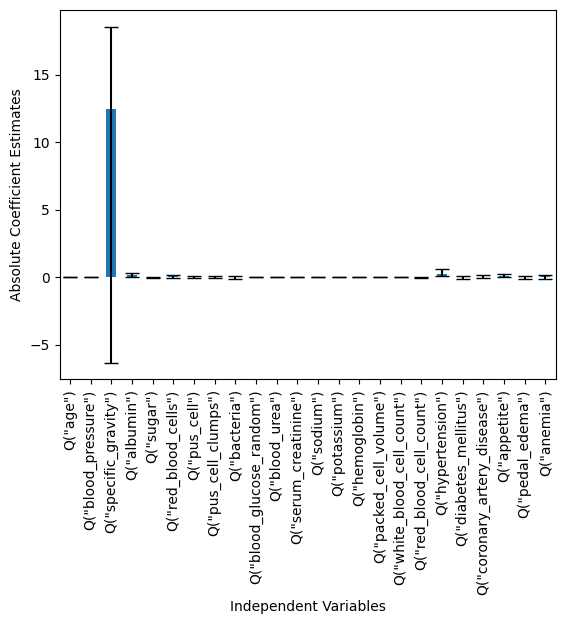

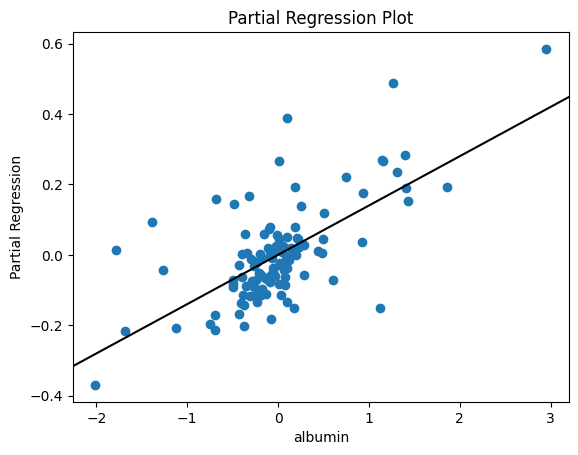

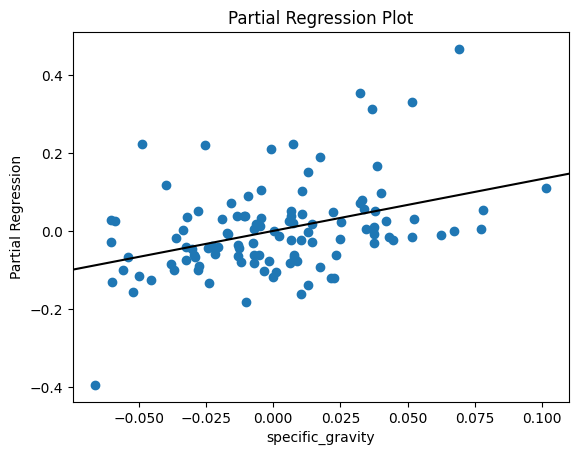

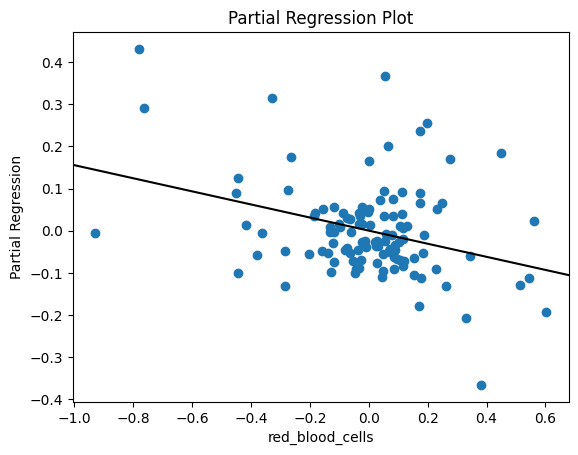

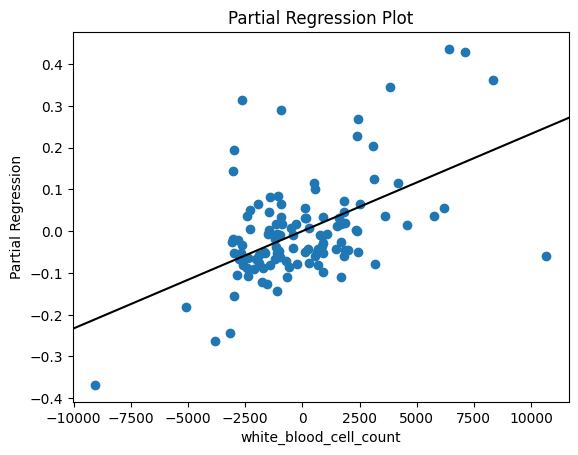

In [22]:
# Coefficient plot
coefs = model.params.drop('Intercept')
coefs_ci = model.conf_int().drop('Intercept', axis=0)
coefs_abs = coefs.abs()
coefs_ci_abs = coefs_ci.abs()
coefs_abs.plot(kind='bar', yerr=(coefs_ci_abs[0], coefs_ci_abs[1]), capsize=5)
plt.xlabel('Independent Variables')
plt.ylabel('Absolute Coefficient Estimates')
plt.show()

# Partial regression plot for relevant independent variables
relevant_vars = ['albumin', 'specific_gravity', 'red_blood_cells', 'white_blood_cell_count']
for var in relevant_vars:
    plot_partregress('class_label', var, exog_others=X.drop(var, axis=1), data=df, obs_labels=False)
    plt.xlabel(var)
    plt.ylabel('Partial Regression')
    plt.show()


In the context of the partial regression plot, the values on the y-axis represent the change in the dependent variable (class_label) associated with a one-unit change in the selected independent variable, while holding all other independent variables constant. A positive value indicates an increase in the dependent variable, while a negative value indicates a decrease.

For example, if the y-value on the plot is 0.2, it suggests that a one-unit increase in the selected independent variable leads to an average increase of 0.2 in the dependent variable, all else being equal. Similarly, a y-value of -0.3 suggests that a one-unit increase in the independent variable leads to an average decrease of 0.3 in the dependent variable, controlling for other variables.

## 6. Conclusion 

The output of the OLS regression reveals several valuable insights into the relationships between various health metrics and the presence of chronic kidney disease, indicated by the 'class_label'.

Firstly, the adjusted R-squared value of 0.950 suggests that approximately 95% of the variation in the 'class_label' can be explained by the independent variables in the model. This high value indicates that the model fits the data well.

Examining the coefficients, we find that 'specific_gravity' and 'albumin' levels, among others, are statistically significant at the 5% level, given their p-values are less than 0.05. This implies that these variables are influential predictors of the presence of chronic kidney disease. The 'specific_gravity' has a negative coefficient, indicating that as specific gravity increases, the likelihood of having chronic kidney disease decreases. Conversely, the 'albumin' level has a positive coefficient, suggesting that higher albumin levels increase the likelihood of the disease.

Simultaneously, several other variables like 'age', 'blood_pressure', and 'blood_glucose_random' do not appear to be statistically significant predictors of the disease, as their p-values are greater than 0.05. However, it doesn't necessarily mean these variables are not clinically significant. Sometimes, a variable might be statistically insignificant due to multicollinearity or insufficient data, but it might still be relevant in a clinical context.

Moreover, the ANOVA test results echo some findings from the OLS regression. For instance, the p-values for 'age', 'blood_pressure', and 'potassium' are all above 0.05, confirming their statistical insignificance in predicting the 'class_label'. Interestingly, however, 'sodium' appears statistically significant in the OLS output but not in the ANOVA test, which might be due to the different statistical assumptions and methodologies employed by each test.

In conclusion, this analysis suggests that certain health metrics, such as 'specific_gravity' and 'albumin', are influential predictors of chronic kidney disease. However, further research is needed, especially because the OLS model shows potential multicollinearity issues as indicated by a large condition number. We will now proceed with our learning models in chapter 5.